<h1>About Dataset </h1>
<h3>Context</h3>
<p>The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.</p>

<h1> Imports and Reading Data </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import charset_normalizer
plt.style.use("ggplot")
%matplotlib inline

<p> The data is not utf-8 encoded so let's check what is the encoding </p>

In [3]:
with open('spam.csv', 'rb') as data: 
    encoding = charset_normalizer.detect(data.read(10000))
print(encoding)

{'encoding': 'cp852', 'language': 'English', 'confidence': 0.9956}


<p> The data is encoded in 'cp852' , now that we know that let's read our data </p>

In [4]:
df = pd.read_csv('spam.csv', encoding = 'cp852')

<h1> Data Understanding </h1>

In [5]:
df.shape

(5572, 5)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ╠_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<h1> Data Preparation / Data Cleaning </h1>

In [11]:
#Dropping irrelevant columns...
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ╠_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h1> Exploratory Data Analysis </h1>

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
ham_percentage =np.round((df['target'].value_counts()[0] / len(df)) * 100)
spam_percentage = np.round((df['target'].value_counts()[1] / len(df)) * 100)
print(ham_percentage, spam_percentage)

87.0 13.0


<p> We have 87% of ham messages, and just 13% of spam messages.Our dataset is clearly imbalance, so metric like accuracy will not be really useful for evaluating our model </p>

<Axes: xlabel='target', ylabel='Count'>

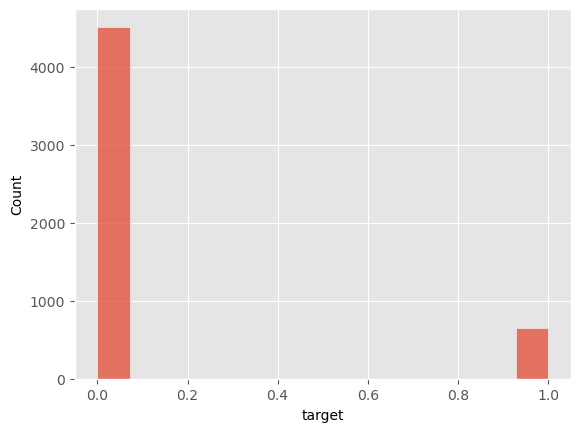

In [20]:
sns.histplot(df['target'])

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAX01010\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#Number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#Brief Statistics of Ham messages...
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#Brief Statistics of Spam Messages...
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<p> By just looking at this statistics we can see that on average spam messages tend to have more characters(close to two times more) than ham messages </p>

<Axes: xlabel='num_characters', ylabel='Count'>

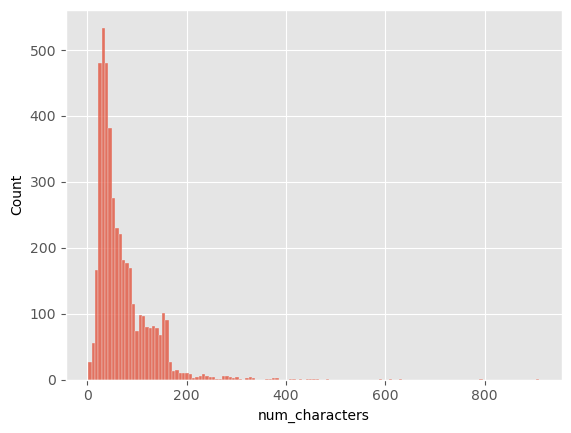

In [32]:
#Let's see the distribution of the numbers of characters for ham messages...
sns.histplot(df[df['target'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

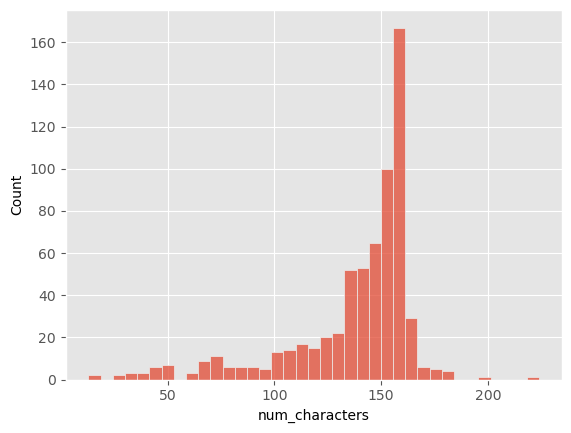

In [33]:
#Let's see the distribution of the number of characters for the spam messages...
sns.histplot(df[df['target'] == 1]['num_characters'])

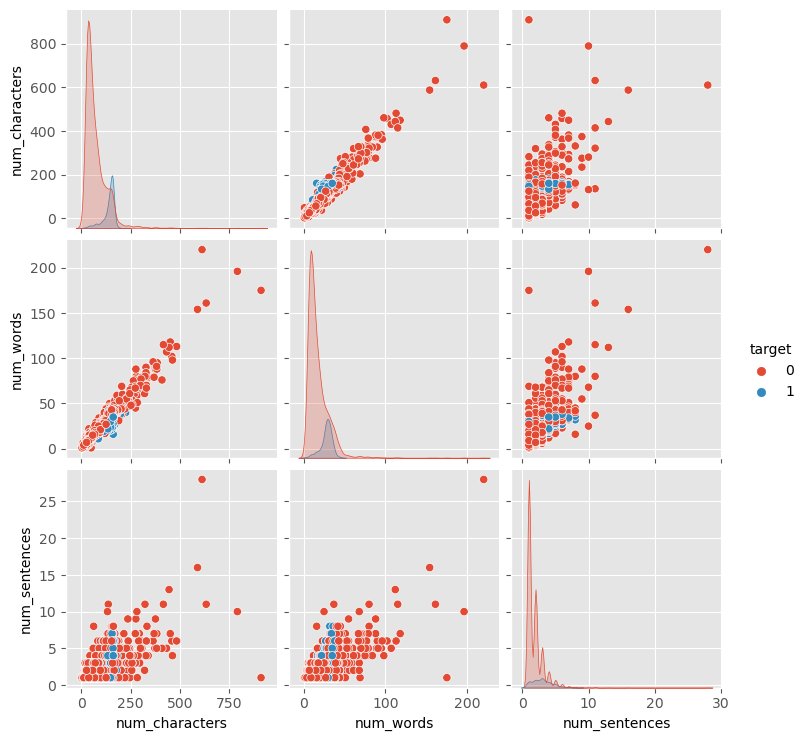

In [34]:
sns.pairplot(df, hue = 'target')

C:\Users\MAX01010\AppData\Local\Temp\ipykernel_1784\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

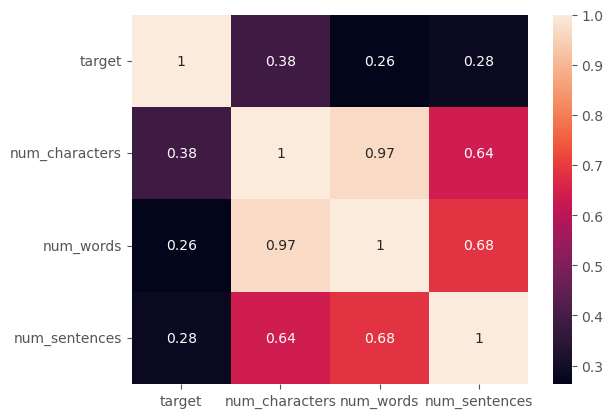

In [35]:
sns.heatmap(df.corr(), annot = True)

<h1> Data Preprocessing </h1>
<ul>
    <li> Lower Case </li>
    <li> Tokenization </li>
    <li> Removing Special Characters </li>
    <li> Removing Stop words and Punctuation </li>
    <li> Stemming </li>
</ul>

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAX01010\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
import string

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def transform_text(text): 
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text: 
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [40]:
transform_text('I loved your ML presentation yesterday')

'love ml present yesterday'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
pip install wordcloud

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 500, min_font_size = 10, background_color = 'white')

In [44]:
#Visualizing  spam-word occurences with a word cloud
spam_wc = wc.generate(df[ df['target'] == 1]['transformed_text'].str.cat(sep = " "))

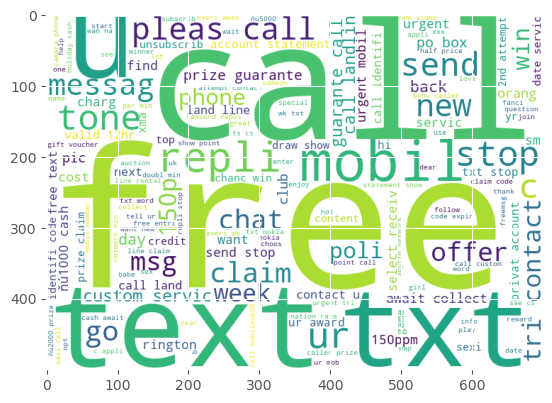

In [45]:
plt.imshow(spam_wc)

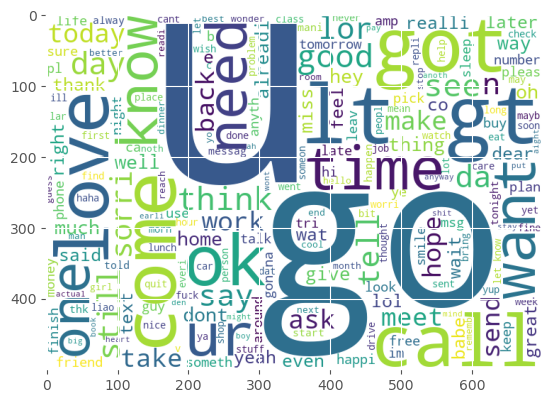

In [46]:
#Visualizing ham-word occurences with a word cloud
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [47]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

10124

In [49]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

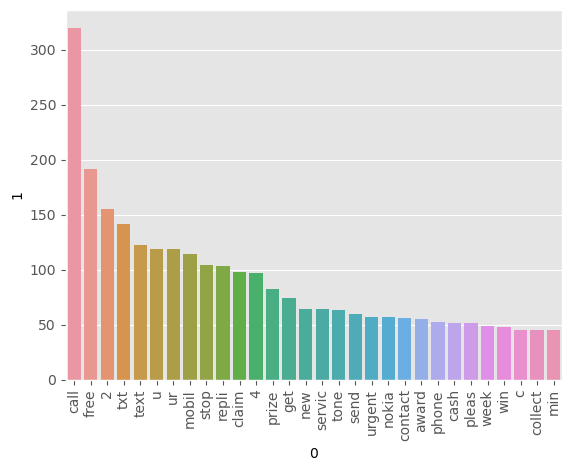

In [50]:
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = spam_corpus_df[0], y = spam_corpus_df[1], data = spam_corpus_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [51]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

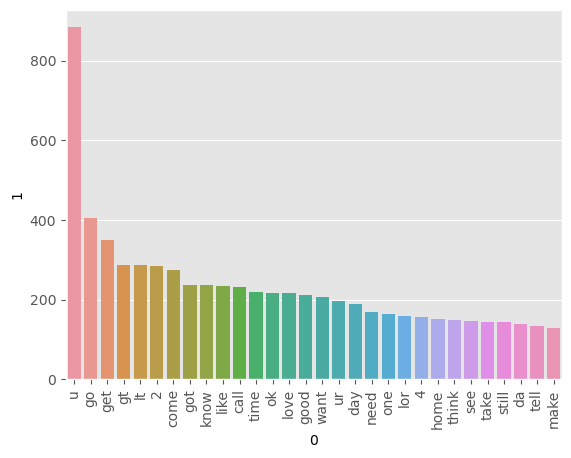

In [52]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x = ham_corpus_df[0], y = ham_corpus_df[1], data = ham_corpus_df)
plt.xticks(rotation = 'vertical')
plt.show()

<h1> Model Building </h1>

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3001)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(5169, 3001)

In [55]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [73]:
#Appending the num_character col to X
X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))

In [74]:
X.shape

(5169, 3002)

In [58]:
y = df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8936170212765957
[[808  88]
 [ 22 116]]
0.5686274509803921


In [94]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [93]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


<p> Let's Keep in Mind that the data is inbalanced so the accuracy_score is not really something we can rely on </p>

<p> For the model i think i will go with bnb </p>

In [75]:
tfidf = TfidfVectorizer(max_features = 3002)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape


(5169, 3002)

In [95]:
#Let's try our model...
message = "You've won an apple 14 click the link below to claim your gain!"

In [96]:
#Preprocess
transformed_message = transform_text(message)
#Vectorized
vector_input = tfidf.transform([transformed_message])
#Predict
result = mnb.predict(vector_input)[0]

In [97]:
result

1

In [98]:
#Let's save our model
import pickle
pickle.dump(tfidf, open('vectorizer4.pkl', 'wb'))
pickle.dump(mnb, open('model4.pkl', 'wb'))